# Import libs

In [1]:
import pandas as pd
import numpy as np
from knn.knn import knn
from dmc.dmc import dmc
from bayes_classifier.bayes_classifier import bayes_classifier
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
from utils.functions import confusion_matrix, confusion_matrix_mean
from matplotlib import pyplot as plt

# Loading Breast Cancer dataset

In [2]:
Xy = pd.read_csv('./datasets/breast_cancer.csv')
Xy.dropna(inplace=True)
X = Xy.drop(['diagnosis', 'id'], axis=1)
y = Xy['diagnosis']

# Running the tests and computing informations

In [3]:
realizations = 20
knn_hit_rate_list = []
dmc_hit_rate_list = []
b_hit_rate_list = []
knn_std_dev = 0
dmc_std_dev = 0
b_std_dev = 0
knn_confusion_matrix_list = []
dmc_confusion_matrix_list = []
b_confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    knn_model = knn(k=3, type_distance_calc='euclidean')
    knn_model.fit(X_train, y_train)

    dmc_model = dmc(type_distance_calc='euclidean')
    dmc_model.fit(X_train, y_train)

    b_model = bayes_classifier()
    b_model.fit(X_train, y_train)

    knn_hit_rate_list.append(knn_model.score(X_test, y_test))
    dmc_hit_rate_list.append(dmc_model.score(X_test, y_test))
    b_hit_rate_list.append(b_model.score(X_test, y_test))

    knn_y_pred = [knn_model.predict(x) for x in X_test.values]
    dmc_y_pred = [dmc_model.predict(x) for x in X_test.values]
    b_y_pred = [b_model.predict(x) for x in X_test.values]

    knn_confusion_matrix_list.append(confusion_matrix(y_test, knn_y_pred))
    dmc_confusion_matrix_list.append(confusion_matrix(y_test, dmc_y_pred))
    b_confusion_matrix_list.append(confusion_matrix(y_test, b_y_pred))

knn_std_dev = np.std(knn_hit_rate_list)
dmc_std_dev = np.std(dmc_hit_rate_list)
b_std_dev = np.std(b_hit_rate_list)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a

# Showing knn informations computed

In [4]:
print('----------------- KNN model -----------------')
print('Hit rate:')
print(knn_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(knn_hit_rate_list)/len(knn_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(knn_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in knn_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KNN model -----------------
Hit rate:
[0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.9385964912280702, 0.956140350877193, 0.8859649122807017, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9210526315789473, 0.8947368421052632]

Accuracy:
0.9206140350877192

Standard Deviation:
0.019901844393927066

Confusion Matrix:
    M   B
M  39   5
B   4  66
    M   B
M  40   5
B   4  65
    B   M
B  67   4
M   5  38
    B   M
B  71   4
M   3  36
    B   M
B  72   2
M  10  30
    M   B
M  39   6
B   6  63
    B   M
B  73   6
M   6  29
    B   M
B  75   3
M   4  32
    B   M
B  74   1
M   4  35
    B   M
B  62   6
M   7  39
    B   M
B  69   3
M   7  35
    B   M
B  77   3
M   7  27
    M   B
M  32   9
B   1  72
    B   M
B  75   2
M   4  33
    M   B
M  36   5
B   3  70
   

In [5]:
confusion_matrix_mean(knn_confusion_matrix_list)

,M,B
M,35,5
B,3,69


# Showing dmc informations computed

In [6]:
print('----------------- DMC model -----------------')
print('Hit rate:')
print(dmc_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(dmc_hit_rate_list)/len(dmc_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(dmc_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in dmc_confusion_matrix_list:
    print(matrix, end='\n')

----------------- DMC model -----------------
Hit rate:
[0.9122807017543859, 0.8859649122807017, 0.8947368421052632, 0.9298245614035088, 0.868421052631579, 0.8859649122807017, 0.8859649122807017, 0.9122807017543859, 0.8596491228070176, 0.8596491228070176, 0.868421052631579, 0.8771929824561403, 0.868421052631579, 0.8771929824561403, 0.8859649122807017, 0.9210526315789473, 0.8947368421052632, 0.9298245614035088, 0.8947368421052632, 0.7894736842105263]

Accuracy:
0.8850877192982457

Standard Deviation:
0.030374192444176804

Confusion Matrix:
    M   B
M  35   9
B   1  69
    M   B
M  33  12
B   1  68
    B   M
B  71   0
M  12  31
    B   M
B  74   1
M   7  32
    B   M
B  73   1
M  14  26
    M   B
M  33  12
B   1  68
    B   M
B  78   1
M  12  23
    B   M
B  77   1
M   9  27
    B   M
B  75   0
M  16  23
    B   M
B  67   1
M  15  31
    B   M
B  71   1
M  14  28
    B   M
B  78   2
M  12  22
    M   B
M  26  15
B   0  73
    B   M
B  76   1
M  13  24
    M   B
M  29  12
B   1  72
    B

In [7]:
confusion_matrix_mean(dmc_confusion_matrix_list)

,M,B
M,28,12
B,0,72


# Showing bayes informations computed

In [8]:
print('----------------- NAIVE BAYES model -----------------')
print('Hit rate:')
print(b_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(b_hit_rate_list)/len(b_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(b_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in b_confusion_matrix_list:
    print(matrix, end='\n')

----------------- NAIVE BAYES model -----------------
Hit rate:
[0.9649122807017544, 0.9473684210526315, 0.9649122807017544, 0.9298245614035088, 0.9473684210526315, 0.9649122807017544, 0.9298245614035088, 0.9473684210526315, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.9298245614035088, 1.0, 0.9824561403508771, 0.9385964912280702, 0.9649122807017544, 0.9385964912280702, 0.9210526315789473]

Accuracy:
0.9530701754385964

Standard Deviation:
0.019273309247999856

Confusion Matrix:
    M   B
M  42   2
B   2  68
    M   B
M  42   3
B   3  66
    B   M
B  70   1
M   3  40
    B   M
B  70   5
M   3  36
    B   M
B  72   2
M   4  36
    M   B
M  44   1
B   3  66
    B   M
B  75   4
M   4  31
    B   M
B  75   3
M   3  33
    B   M
B  73   2
M   1  38
    B   M
B  64   4
M   2  44
    B   M
B  67   5
M   1  41
    B   M
B  78   2
M   3  31
    M   B
M  40   1
B   3  70
    B   M
B  71   6
M   2  35
    M   B
M  41   0
B   0  73
    B   M


In [9]:
confusion_matrix_mean(b_confusion_matrix_list)

,M,B
M,38,2
B,3,70


# Choosing two columns from the last X_train and X_test to plot decision surface

In [10]:
X_train_2d, X_test_2d = X_train[['radius_mean', 'texture_mean']], X_test[['radius_mean', 'texture_mean']]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
     radius_mean  texture_mean
226        10.44         15.46
515        11.34         18.61
230        17.05         19.08
156        17.68         20.74
311        14.61         15.69
..           ...           ...
393        21.61         22.28
77         18.05         16.15
387        13.88         16.16
375        16.17         16.07
142        11.43         17.31

[455 rows x 2 columns]
Test dataset:
     radius_mean  texture_mean
412        9.397         21.68
321       20.160         19.66
201       17.540         19.32
149       13.740         17.91
352       25.730         17.46
..           ...           ...
210       20.580         22.14
186       18.310         18.58
494       13.160         20.54
297       11.760         18.14
470        9.667         18.49

[114 rows x 2 columns]


# Training the models with the new dataset 2d

In [11]:
knn_model = knn(k=3, type_distance_calc='euclidean')
knn_model.fit(X_train_2d, y_train)
dmc_model = dmc(type_distance_calc='euclidean')
dmc_model.fit(X_train_2d, y_train)
b_model = bayes_classifier()
b_model.fit(X_train_2d, y_train)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Plotting knn decision surface

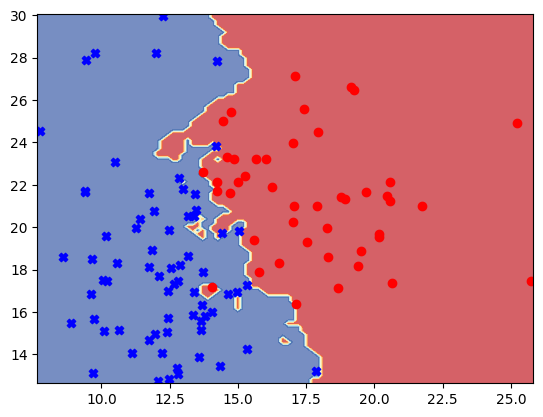

In [12]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[knn_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'M':
        y_pred[0][i] = 1
    else:
        y_pred[0][i] = 2

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

knn_y_pred = np.array([knn_model.predict(x) for x in X_test_2d.values])

M = np.where(knn_y_pred == 'M')
B = np.where(knn_y_pred == 'B')

plt.scatter(data[M, 0], data[M, 1],
            color='red', marker='o', label='M')
plt.scatter(data[B, 0], data[B, 1],
            color='blue', marker='X', label='B')

plt.show()

# Plotting dmc decision surface

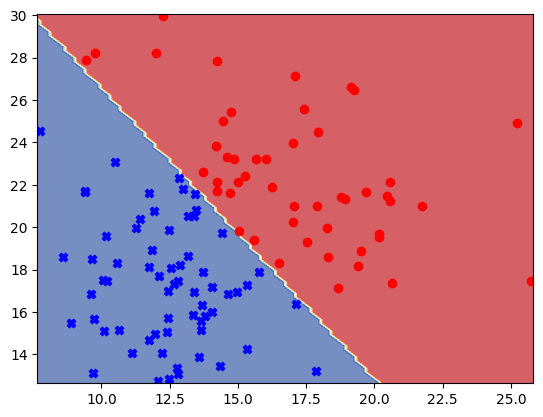

In [13]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[dmc_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'M':
        y_pred[0][i] = 1
    else:
        y_pred[0][i] = 2

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

dmc_y_pred = np.array([dmc_model.predict(x) for x in X_test_2d.values])

M = np.where(dmc_y_pred == 'M')
B = np.where(dmc_y_pred == 'B')

plt.scatter(data[M, 0], data[M, 1],
            color='red', marker='o', label='M')
plt.scatter(data[B, 0], data[B, 1],
            color='blue', marker='X', label='B')

plt.show()

# Plotting bayes decision surface

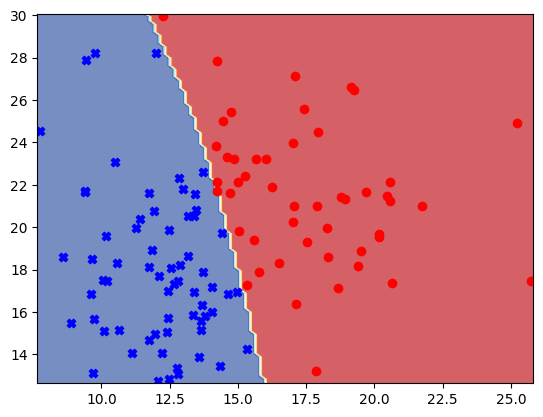

In [14]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[b_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'M':
        y_pred[0][i] = 1
    else:
        y_pred[0][i] = 2

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

b_y_pred = np.array([b_model.predict(x) for x in X_test_2d.values])

M = np.where(b_y_pred == 'M')
B = np.where(b_y_pred == 'B')

plt.scatter(data[M, 0], data[M, 1],
            color='red', marker='o', label='M')
plt.scatter(data[B, 0], data[B, 1],
            color='blue', marker='X', label='B')

plt.show()